In [1]:
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


In [3]:
BATCH_SIZE = 1
IMAGE_SIZE = 128
CHANNELS=3
EPOCHS=50

In [4]:
import tensorflow as tf
from keras import  models , layers
import matplotlib.pyplot as plt
import keras

In [5]:
data = keras.preprocessing.image_dataset_from_directory(
    "CLEANED_IMAGES",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

Found 86378 files belonging to 84 classes.


In [6]:
def train_test_split(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [7]:
train , validation , test = train_test_split(data)

In [8]:
len(validation)


8637

In [9]:
train_ = train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation = validation.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test = test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [10]:
resize_and_rescale = keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255),
])

In [11]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)  # (128, 128, 3)

model = models.Sequential([
    layers.Input(shape=input_shape),  # No batch size specified
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(84, activation='relu'),
    layers.Dense(84, activation='softmax'),
])


In [12]:
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
history = model.fit(
    train , 
    batch_size=BATCH_SIZE,# Ensure the batch size is specified here
    validation_data=validation,
    epochs=5
)


Epoch 1/5
69102/69102 ━━━━━━━━━━━━━━━━━━━━ 181s 2ms/step - accuracy: 0.5079 - loss: 1.8570 - val_accuracy: 0.8276 - val_loss: 0.5675
Epoch 2/5
69102/69102 ━━━━━━━━━━━━━━━━━━━━ 167s 2ms/step - accuracy: 0.8087 - loss: 0.6297 - val_accuracy: 0.8475 - val_loss: 0.5076
Epoch 3/5
69102/69102 ━━━━━━━━━━━━━━━━━━━━ 166s 2ms/step - accuracy: 0.8212 - loss: 0.6007 - val_accuracy: 0.7912 - val_loss: 0.7019
Epoch 4/5
69102/69102 ━━━━━━━━━━━━━━━━━━━━ 165s 2ms/step - accuracy: 0.8211 - loss: 0.6090 - val_accuracy: 0.8467 - val_loss: 0.5022
Epoch 5/5
69102/69102 ━━━━━━━━━━━━━━━━━━━━ 166s 2ms/step - accuracy: 0.8219 - loss: 0.6186 - val_accuracy: 0.8264 - val_loss: 0.6500


In [15]:
scores = model.evaluate(test)


8639/8639 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.8070 - loss: 0.7040


In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [21]:
class_names = data.class_names

first image to predict
actual label: 7A B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
predicted label: dal_I


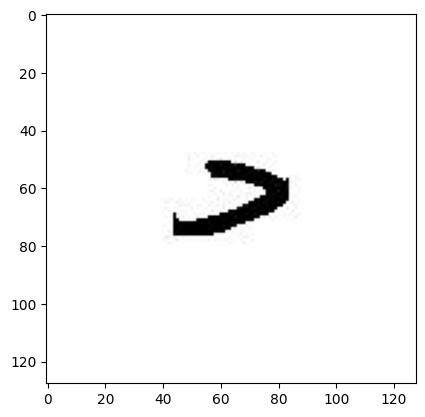

In [41]:
import numpy as np
for images_batch, labels_batch in test.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])